#### **1. 개인/기관순매수 이상치 제거 후 정규성 검정**
-> 개인은 샤피로/쟈크베라검정 모두 따르나
-> 기관은 샤피로만 정규성검정 따름

#### **2. 개인/기관순매수 이상치 제거 후 월별합 한거를 코스피 종가와 등락률합침**

------

> 1번과정 (feat. 개인순매수 전처리)

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

In [3]:
#매수량 데이터 불러옴
df_person = pd.read_csv('./data/pre_kospi.csv')
df_person.head(3)

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2,2728.21,0.0035,2022-04-21,-5667,-597,6366


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missin

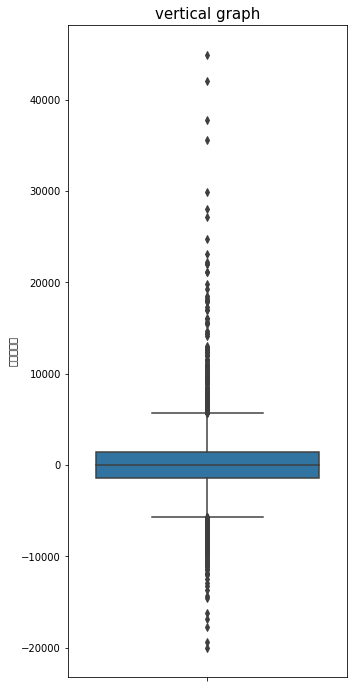

In [4]:
# 개인순매수 boxplot그래프
plt.figure(figsize = (5,12))
sns.boxplot(y='개인순매수', data = df_person)
plt.title('vertical graph', size = 15)
plt.show()

In [5]:
#개인순매수 이상치제거 함수 생성
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df['개인순매수'].values, 25)
  quantile_75 = np.percentile(df['개인순매수'].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df['개인순매수'][ (df['개인순매수'] < lowest) | (df['개인순매수'] > highest) ].index
  return outlier_idx

In [6]:
#개인매수량에서 이상치 있는 인덱스 추출
outlier_idx = get_outlier(df=df_person, column='개인순매수', weight=1.5)

In [7]:
#개인순매수량에서 이상치 있는 행 329행
df_out = df_person.loc[outlier_idx]
df_out

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
6,6,2696.06,-0.0076,2022-04-15,7486,-3181,-4426
8,8,2716.49,0.0186,2022-04-13,-5842,-649,6393
12,12,2695.86,-0.0143,2022-04-07,12799,-7683,-5203
...,...,...,...,...,...,...,...
3632,3632,1828.49,-0.0420,2007-08-10,7412,-5257,-2155
3639,3639,1856.45,-0.0397,2007-08-01,5838,-5192,-646
3642,3642,1883.22,-0.0409,2007-07-27,7138,-8425,1287
3842,3842,1319.40,-0.0241,2006-10-09,-6019,4739,1279


In [10]:
#개인순매수에서 이상치있는 행 삭제
person_out_drop = df_person.drop(outlier_idx, axis=0)
person_out_drop
#Unnamed:0 열 삭제
person_out_drop.drop('Unnamed: 0', axis=1, inplace=True)
person_out_drop

,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,2718.89,0.0095,2022-04-19,-3431,331,3364
5,2693.21,-0.0011,2022-04-18,1020,-947,-188
7,2716.71,0.0001,2022-04-14,898,-2528,1547
...,...,...,...,...,...,...
4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,886.90,-0.0076,2005-01-04,-63,397,-334


In [9]:
finish_person=person_out_drop[['날짜','개인순매수']]
finish_person.head(3)

,날짜,개인순매수
2,2022-04-21,-5667
3,2022-04-20,738
4,2022-04-19,-3431


In [11]:
finish_person['날짜']=pd.to_datetime(finish_person['날짜'])
finish_person['년도']=finish_person['날짜'].dt.strftime("%Y ")
finish_person['월']=finish_person['날짜'].dt.strftime("%m")
finish_person.head(5)

,날짜,개인순매수,년도,월
2,2022-04-21,-5667,2022,04
3,2022-04-20,738,2022,04
4,2022-04-19,-3431,2022,04
5,2022-04-18,1020,2022,04
7,2022-04-14,898,2022,04


In [12]:
finish_person=finish_person.groupby(['년도','월'],as_index=False).sum()
finish_person.head(5)

,년도,월,개인순매수
0,2005,01,-9523
1,2005,02,-5725
2,2005,03,3820
3,2005,04,2291
4,2005,05,-18304


>> 이상치제거한 개인순매수량의 QQplot 및 정규성 검증 시행

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing

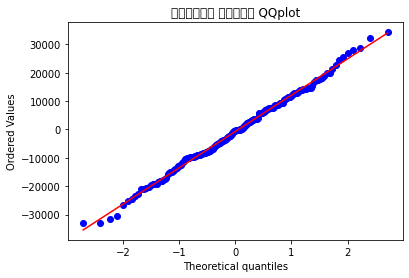

In [13]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(finish_person['개인순매수'],plot=plt) 
plt.title('이상치제거한 개인순매수 QQplot')
plt.show()

In [14]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(finish_person['개인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(finish_person['개인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  86.32163405% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  98.38939378% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


-------------------

> 1번과정 (feat. 기관순매수 전처리)

In [15]:
#매수량 데이터 불러옴
df_company = pd.read_csv('./data/pre_kospi.csv')
df_company.head(3)

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2,2728.21,0.0035,2022-04-21,-5667,-597,6366


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missi

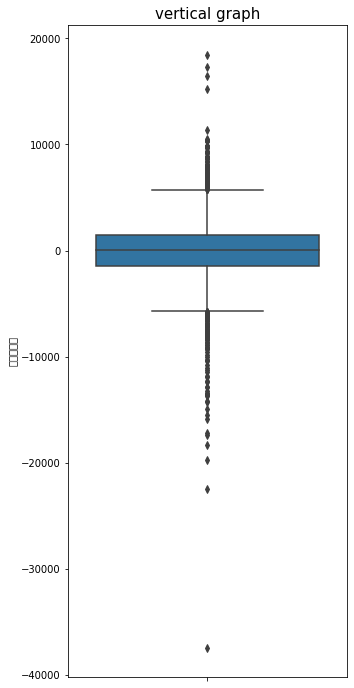

In [16]:
#기관순매수 boxplot그래프
plt.figure(figsize = (5,12))
sns.boxplot(y='기관순매수', data = df_company)
plt.title('vertical graph', size = 15)
plt.show()

In [17]:
#기관매수량에서 이상치 있는 인덱스 추출
outlier_idxx = get_outlier(df=df_company, column='기관순매수', weight=1.5)

In [18]:
#기관순매수량에서 이상치 있는 행 329행
company_out = df_company.loc[outlier_idxx]
company_out

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
6,6,2696.06,-0.0076,2022-04-15,7486,-3181,-4426
8,8,2716.49,0.0186,2022-04-13,-5842,-649,6393
12,12,2695.86,-0.0143,2022-04-07,12799,-7683,-5203
...,...,...,...,...,...,...,...
3632,3632,1828.49,-0.0420,2007-08-10,7412,-5257,-2155
3639,3639,1856.45,-0.0397,2007-08-01,5838,-5192,-646
3642,3642,1883.22,-0.0409,2007-07-27,7138,-8425,1287
3842,3842,1319.40,-0.0241,2006-10-09,-6019,4739,1279


In [19]:
#기관순매수에서 이상치있는 행 삭제 4063행 남음
company_out_drop = df_person.drop(outlier_idxx, axis=0)
company_out_drop
#Unnamed:0 열 삭제
company_out_drop.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
company_out_drop

,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,2718.89,0.0095,2022-04-19,-3431,331,3364
5,2693.21,-0.0011,2022-04-18,1020,-947,-188
7,2716.71,0.0001,2022-04-14,898,-2528,1547
...,...,...,...,...,...,...
4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,886.90,-0.0076,2005-01-04,-63,397,-334


In [21]:
finish_company=company_out_drop[['날짜','기관순매수']]
finish_company.head(3)

,날짜,기관순매수
2,2022-04-21,6366
3,2022-04-20,-1612
4,2022-04-19,3364


In [22]:
finish_company['날짜']=pd.to_datetime(finish_company['날짜'])
finish_company['년도']=finish_company['날짜'].dt.strftime("%Y ")
finish_company['월']=finish_company['날짜'].dt.strftime("%m")
finish_company.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_13612\3724860825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_company['날짜']=pd.to_datetime(finish_company['날짜'])
C:\Users\user\AppData\Local\Temp\ipykernel_13612\3724860825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_company['년도']=finish_company['날짜'].dt.strftime("%Y ")
C:\Users\user\AppData\Local\Temp\ipykernel_13612\3724860825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,날짜,기관순매수,년도,월
2,2022-04-21,6366,2022,04
3,2022-04-20,-1612,2022,04
4,2022-04-19,3364,2022,04
5,2022-04-18,-188,2022,04
7,2022-04-14,1547,2022,04


In [23]:
finish_company=finish_company.groupby(['년도','월'],as_index=False).sum()
finish_company.head(5)

,년도,월,기관순매수
0,2005,01,984
1,2005,02,-8928
2,2005,03,16920
3,2005,04,955
4,2005,05,17254


>> 이상치제거한 기관순매수량의 QQplot 및 정규성 검증 시행
-> 쟈크베라만 만족

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing

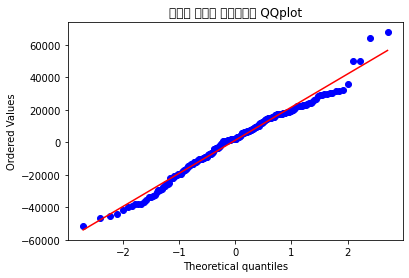

In [24]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(finish_company['기관순매수'],plot=plt) 
plt.title('이상치 제거한 기관순매수 QQplot')
plt.show()

In [25]:
# shapiro 검정 시행 
from scipy.stats import shapiro

stats, pval = shapiro(finish_company['기관순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(finish_company['기관순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  1.71854589% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  48.75385907% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


-------

In [26]:
finish_person

,년도,월,개인순매수
0,2005,01,-9523
1,2005,02,-5725
2,2005,03,3820
3,2005,04,2291
4,2005,05,-18304
...,...,...,...
203,2021,12,-30452
204,2022,01,12674
205,2022,02,-10135
206,2022,03,-3604


In [27]:
finish_company

,년도,월,기관순매수
0,2005,01,984
1,2005,02,-8928
2,2005,03,16920
3,2005,04,955
4,2005,05,17254
...,...,...,...
203,2021,12,15846
204,2022,01,6687
205,2022,02,-3629
206,2022,03,6022


#### 데이터 합치기

In [29]:
finish_person['기관순매수'] = finish_company['기관순매수']
finish_person_company=finish_person

In [30]:
finish_person_company.to_csv('이상치제거한_개인기관순매수_월별합.csv')

In [ ]:
이상치제거한월별외국인순매수와종가합.csv
